### Forecasting

In [1]:
# Imports required packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data Set

_This data set contains demand for Kesh, a shampoo brand, which is sold in 100 ml. bottles by We Sell Beauty (WSB), a manufacturer and distributor of health and beauty products._

In [2]:
sell = pd.read_csv("./../../Data/we_sell_beauty.csv")

display(sell.head(20))

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


## Exploratory Data Analysis (EDA)

In [3]:
# Gets basic information about the data set

sell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


The above information shows that the data set contains the following information for the sale of 100 ml. bottle for 48 months i.e. 4 years.
- Sale quantity,
- Promotion expenses incurred and
- Competitive promotion, if any, was there

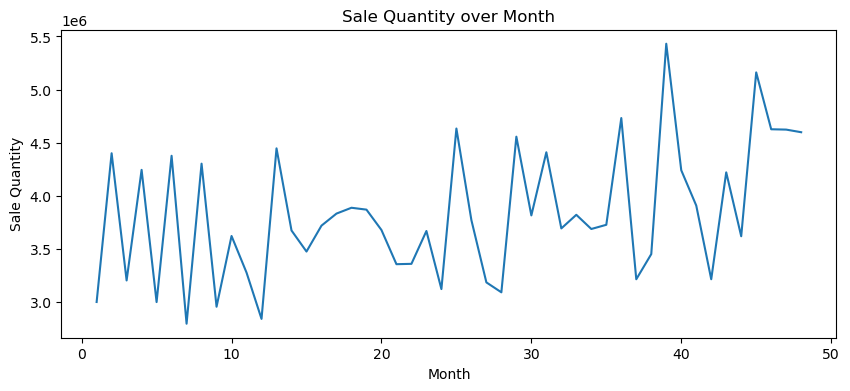

In [4]:
# Plots sale againt months

plt.figure(figsize=(10,4))
plt.plot(sell.Month, sell["Sale Quantity"])
plt.xlabel("Month")
plt.ylabel("Sale Quantity")
plt.title("Sale Quantity over Month")
plt.show()

## Forecasting using Moving Average (MA)

In [5]:
# Calculating rolling moving average for window of 12 months and 
sell["mov_avg_12"] = sell["Sale Quantity"].rolling(window=12).mean().shift(1)

In [6]:
# Prints the forecasted values for last one year
display(sell[36:])

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mov_avg_12
36,37,3216483,121,1,3.928410e+06
37,38,3453239,128,0,3.810280e+06
38,39,5431651,170,0,3.783643e+06
39,40,4241851,160,0,3.970688e+06
40,41,3909887,151,1,4.066369e+06
41,42,3216438,120,1,4.012413e+06
42,43,4222005,152,0,3.962370e+06
43,44,3621034,125,0,3.946629e+06
44,45,5162201,170,0,3.940490e+06
45,46,4627177,160,0,4.052117e+06


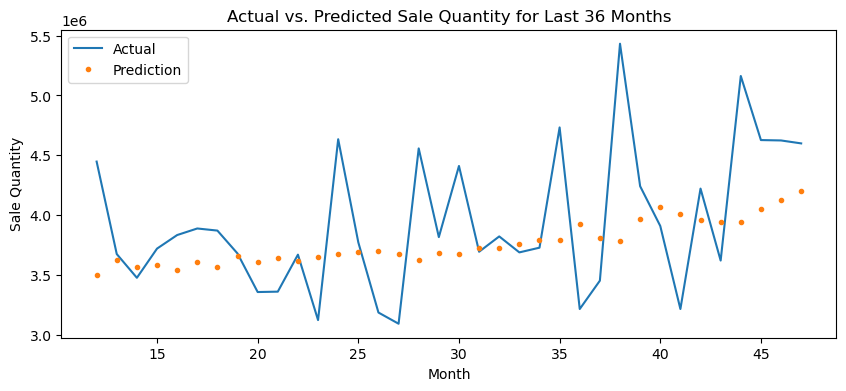

In [7]:
# Plots the predictions against the actual sale for last one year
plt.figure(figsize=(10,4))
plt.xlabel("Month")
plt.ylabel("Sale Quantity")
plt.plot(sell["Sale Quantity"][12:], label="Actual")
plt.plot(sell["mov_avg_12"][12:], '.', label="Prediction")
plt.legend()
plt.title("Actual vs. Predicted Sale Quantity for Last 36 Months")
plt.show()

### Evaluating Moving Average Based Forecasting Performance for Last 12 Months

In [8]:
# Calculates Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(
    sell["Sale Quantity"][36:], sell["mov_avg_12"][36:]) * 100

print("MAPE for Moving Average is {:.2f}%".format(mape))

MAPE for Moving Average is 14.04%


In [9]:
# Calculates the Root Mean Squared Eror (RMSE)
rmse = mean_squared_error(
    sell["Sale Quantity"][36:], sell["mov_avg_12"][36:], squared=False)

print("RMSE for Moving Average is {:.2f}".format(rmse))

RMSE for Moving Average is 734725.84


## Forecasting using (Simple) Exponential Smoothing

In [10]:
sell["ewm"] = sell["Sale Quantity"].ewm(alpha=0.2).mean()

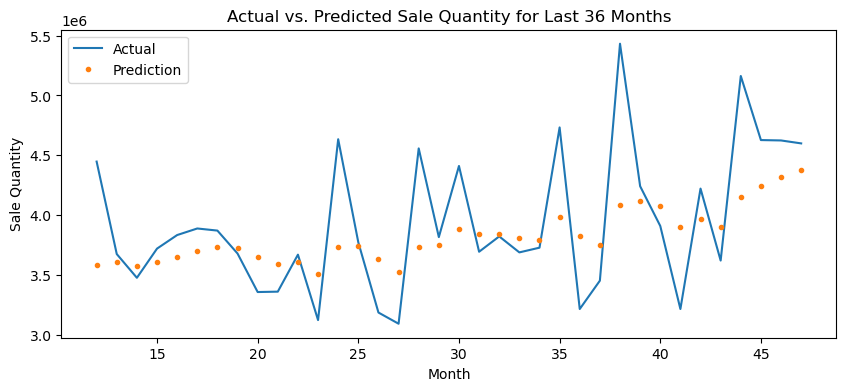

In [11]:
# Plots the predictions against the actual sale for last one year
plt.figure(figsize=(10,4))
plt.xlabel("Month")
plt.ylabel("Sale Quantity")
plt.plot(sell["Sale Quantity"][12:], label="Actual")
plt.plot(sell["ewm"][12:], '.', label="Prediction")
plt.legend()
plt.title("Actual vs. Predicted Sale Quantity for Last 36 Months")
plt.show()

In [12]:
### Evaluating Exponential Smoothing Based Forecasting Performance

### Evaluating Exponential Smoothing Based Forecasting Performance for Last 12 Months

In [12]:
# Calculates Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(
    sell["Sale Quantity"][36:], sell["ewm"][36:]) * 100

print("MAPE for Exponential Smoothing is {:.2f}%".format(mape))

MAPE for Exponential Smoothing is 11.15%


In [13]:
# Calculates the Root Mean Squared Eror (RMSE)
rmse = mean_squared_error(
    sell["Sale Quantity"][36:], sell["ewm"][36:], squared=False)

print("RMSE for Exponential Smoothing is {:.2f}".format(rmse))

RMSE for Exponential Smoothing is 593857.53


## Decomposing Time-series

In [14]:
# Decomposes time-series data into trend, seasonal and residual components
sell_decomposed = seasonal_decompose(
    np.array(sell["Sale Quantity"]), model="multiplicative", period=12)

In [15]:
# Captures the trend and seasonal components
sell["trend"] = sell_decomposed.trend
sell["seasonal"] = sell_decomposed.seasonal

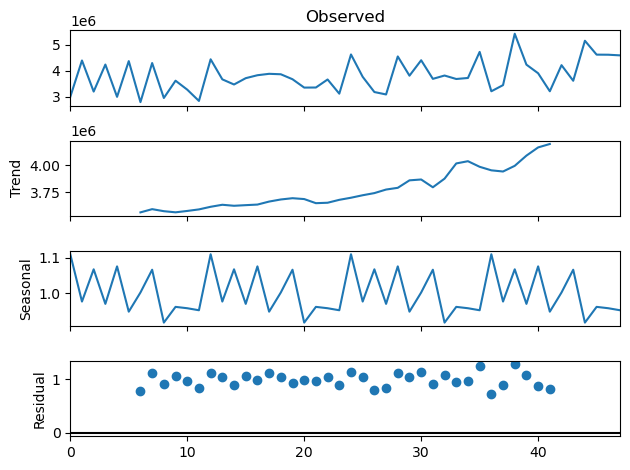

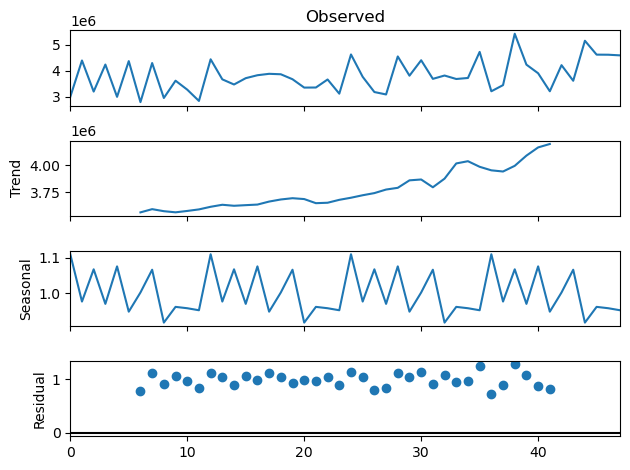

In [16]:
# Plots decomposed components
sell_decomposed.plot()